# Weather Data Analysis
*Author: Olga Sieradzan*

This notebook focuses on analying and forcating weather patterns using the Weather data set from kaggle. 

***

The notebook is organized as follows:

**Part 1**: Data Cleaning

**Part 2**: Exploratory data analysys

**Part 3**: Weather forecasting based on historical data

***


## Data Cleaning

This part consist of getting known the dataset in order to converting data types and handle missing values or Nan's.

***

### Libraries and option setting

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import re

# Setting up max display in notebook 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

***

## Raw data 

Dataset consist of **14 colums** describing weather at the small town in Poland, collected by the meterodical station. Data was collected since 1980 till 2024 hourly, maiking the dataset **389497 rows** big

The variables in dataset are: 

* Temperature
* Relative humidity
* Dew point
* Precipitation (mm)
* Rain (mm)
* Snowfall (mm)
* Pressure msl (hPa)
* Surface_pressure (hPa)
* Cloud cover (%)
* Cloud cover low (%)
* Cloud cover mid (%)
* Cloud cover high (%)
* Vapour pressure deficit (kPa)
* Wind speed (km/h)





In [30]:
raw_data = pd.read_csv("C:/Users/olgas/OneDrive/Documents/GitHub/Time-Series-Weather-Prediction-Notebook/Data/Weather_Data_1980_2024(hourly).csv", parse_dates = ['time'])
raw_data.head()

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h)
0,1980-01-01 00:00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5
1,1980-01-01 01:00:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9
2,1980-01-01 02:00:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5
3,1980-01-01 03:00:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6
4,1980-01-01 04:00:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7


In [31]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389496 entries, 0 to 389495
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   time                           389496 non-null  datetime64[ns]
 1   temperature                    389496 non-null  float64       
 2   relative_humidity              389496 non-null  int64         
 3   dew_point                      389496 non-null  float64       
 4   precipitation (mm)             389496 non-null  float64       
 5   rain (mm)                      389496 non-null  float64       
 6   snowfall (cm)                  389496 non-null  int64         
 7   pressure_msl (hPa)             389496 non-null  float64       
 8   surface_pressure (hPa)         389496 non-null  float64       
 9   cloud_cover (%)                389496 non-null  int64         
 10  cloud_cover_low (%)            389496 non-null  int64         
 11  

As the table above show, there will be no problem with data types since all of the data is either intiger or float or datetime. 

Additionally, we dont have to worry about null entries, since there are none of them in the whole dataset.

***

For now it would be all from data cleaning since we have no null entries and all of the data types are correct and easy to work with. In the next part there will be check of relations, distributions and statistic of considered variables. Based on that information, variables will be selected for a model. 

***

## Exploratory Data Analysis

This project aims to predict temperature based on other weather conditions. In order to create well working model, variables needs to fullfil two criteria:

* variable need to be highly correlated with the temerature

* varibale cannot be  highly correlated with other variables

In this part we will learn more about all of the variables and the relation between them. Finally set of varaibles will be chosen that will explain temperature th best. 

***


### Histograms

Firstly, it is nice to know distrubutions and statistics of variables we are working with.

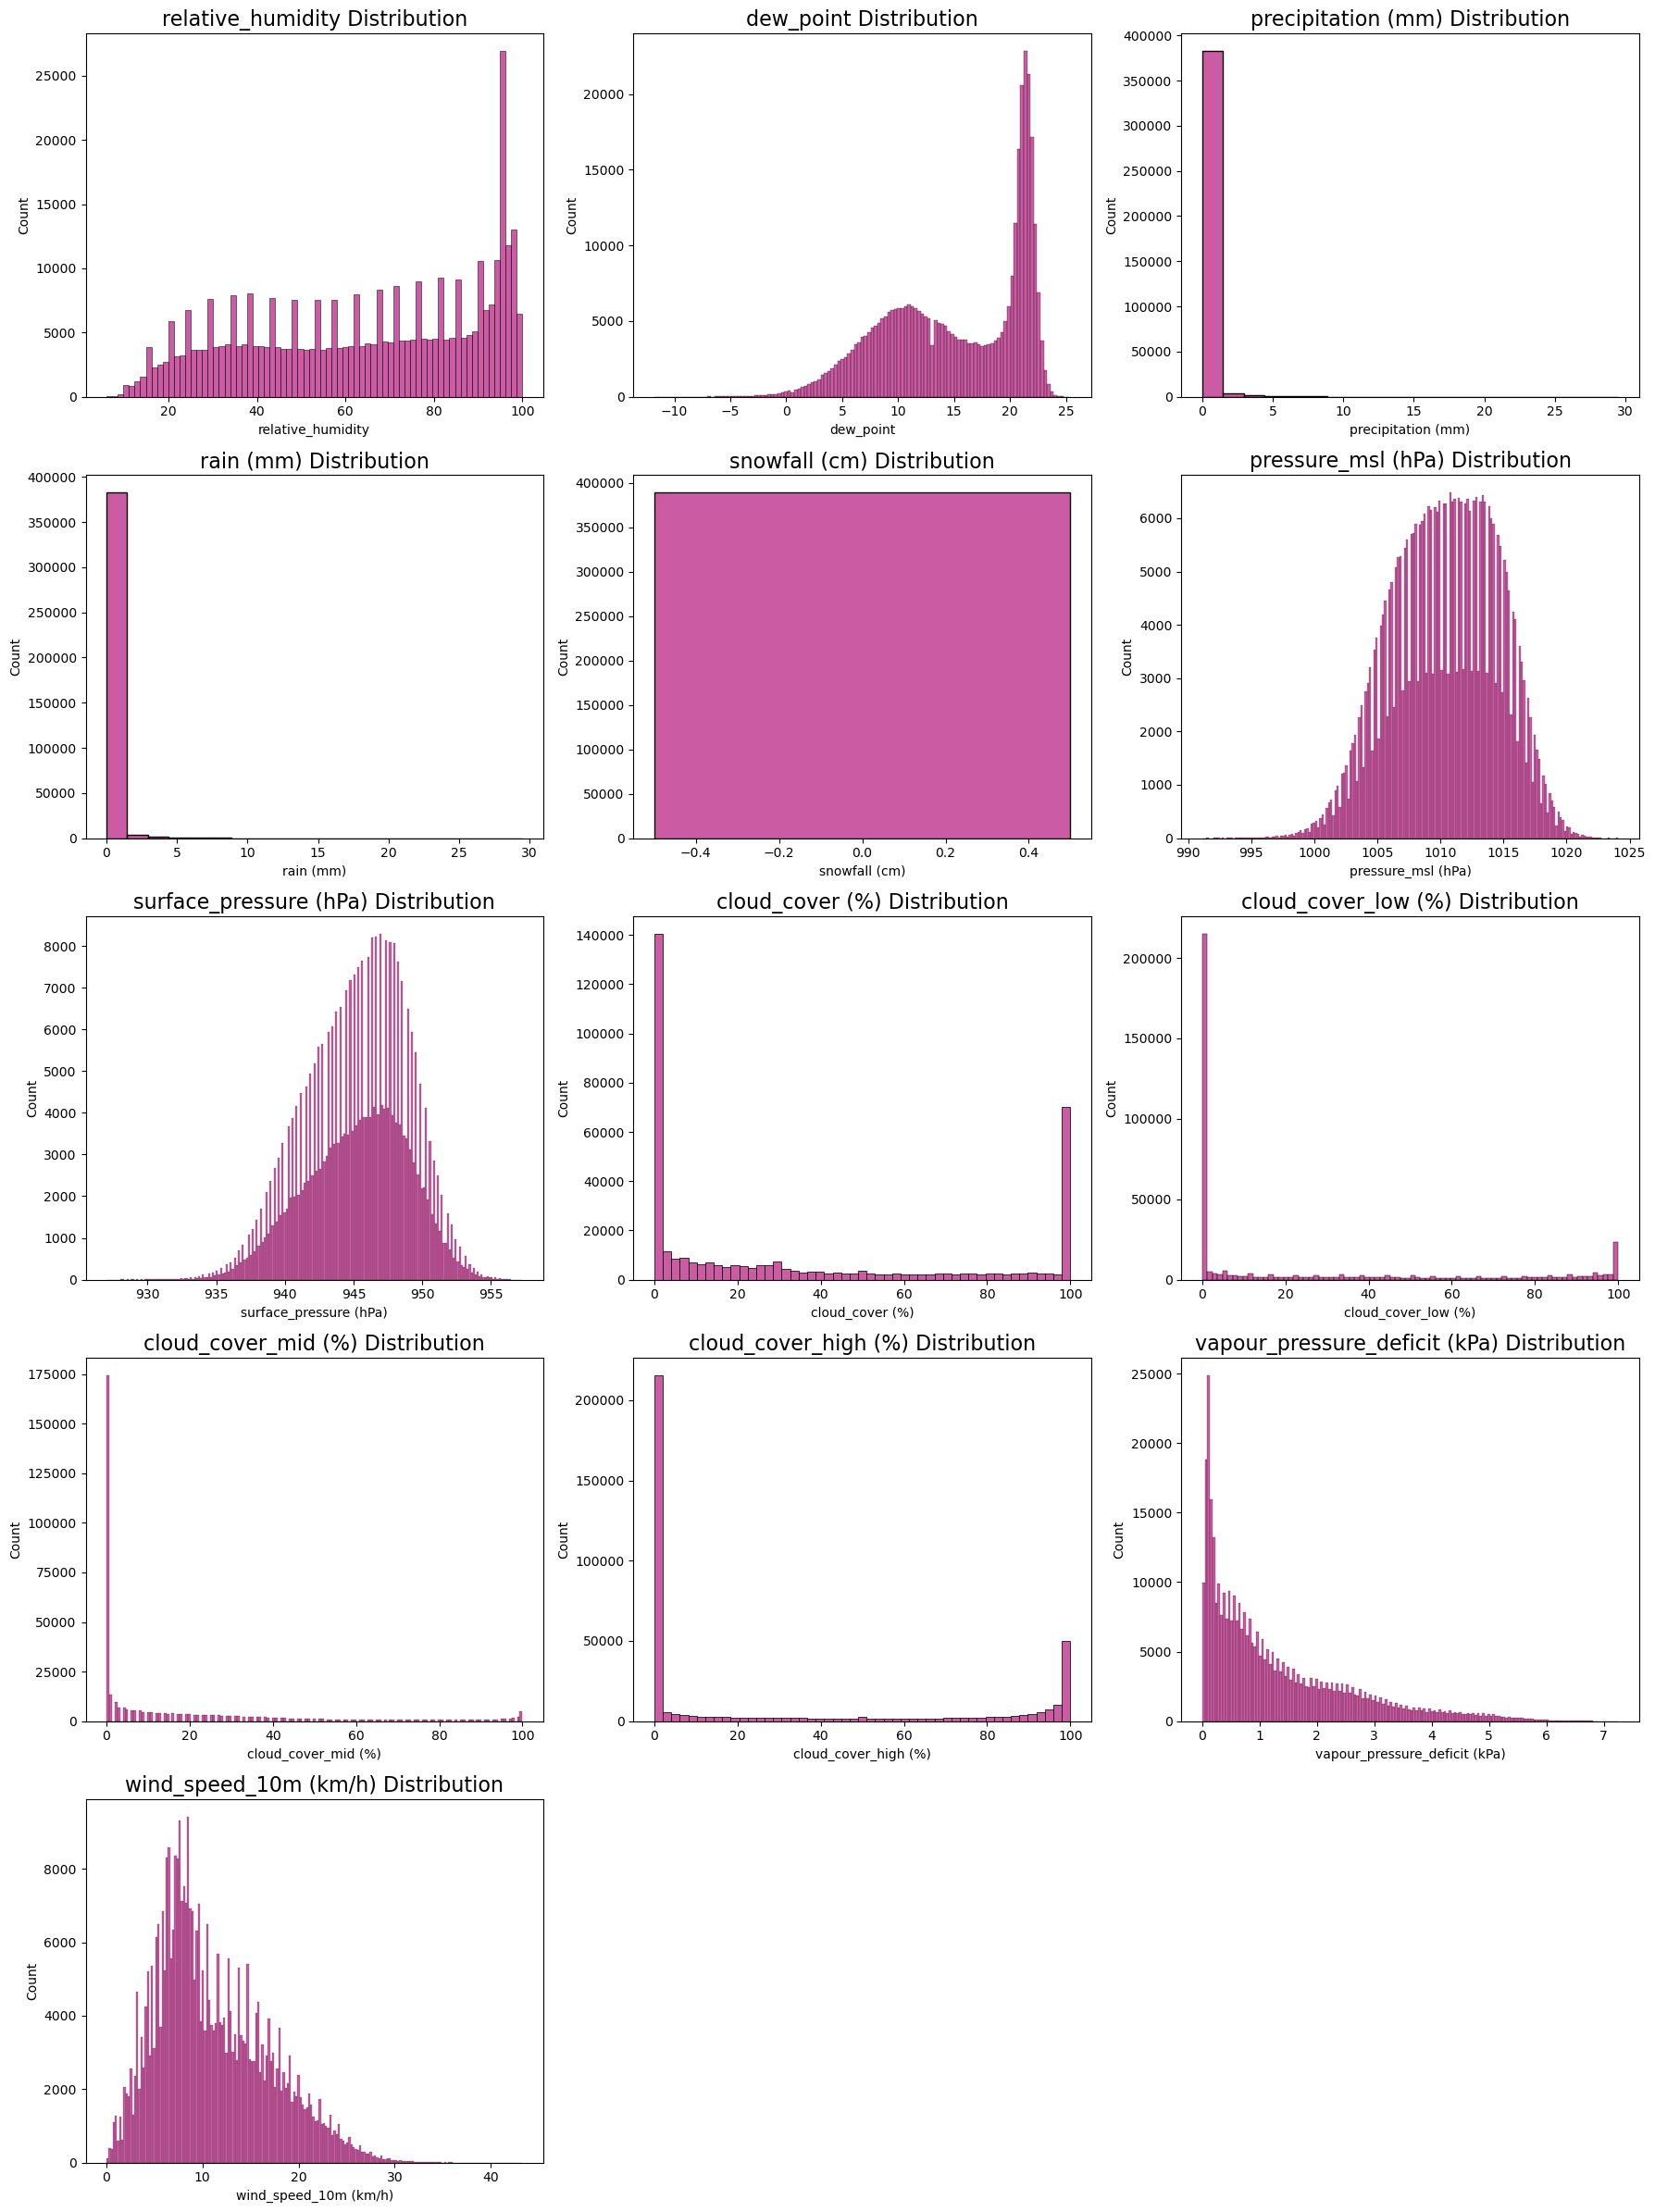

In [32]:
def histplots (data, var, ax) :
    sns.histplot(x = data[var], color = "#BA2684", ax = ax)
    ax.set_title(f"{var} Distribution", fontsize = 16)

cols = raw_data.columns[2:]
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(cols):
    histplots(raw_data, col, axes[i])

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [33]:
raw_data.drop(["time", "snowfall (cm)"], axis = 1, inplace = True)
raw_data.describe().round(2)

,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h)
count,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00
mean,24.13,63.95,15.23,0.11,0.11,1010.37,945.28,35.15,24.29,16.73,30.08,1.29,10.99
std,5.00,25.82,6.10,0.57,0.57,4.18,3.72,39.43,35.53,26.15,40.57,1.26,5.80
min,7.10,6.00,-11.80,0.00,0.00,991.10,927.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,21.50,42.00,10.20,0.00,0.00,1007.30,942.70,0.00,0.00,0.00,0.00,0.30,6.70
50%,23.40,67.00,16.10,0.00,0.00,1010.50,945.60,16.00,0.00,2.00,0.00,0.85,9.70
75%,27.00,89.00,21.10,0.00,0.00,1013.60,948.00,75.00,45.00,24.00,75.00,1.94,14.80
max,41.70,100.00,25.40,29.50,29.50,1024.10,957.30,100.00,100.00,100.00,100.00,7.25,43.30


### Scatter plots

Lets get a first look at variables relations with temperature

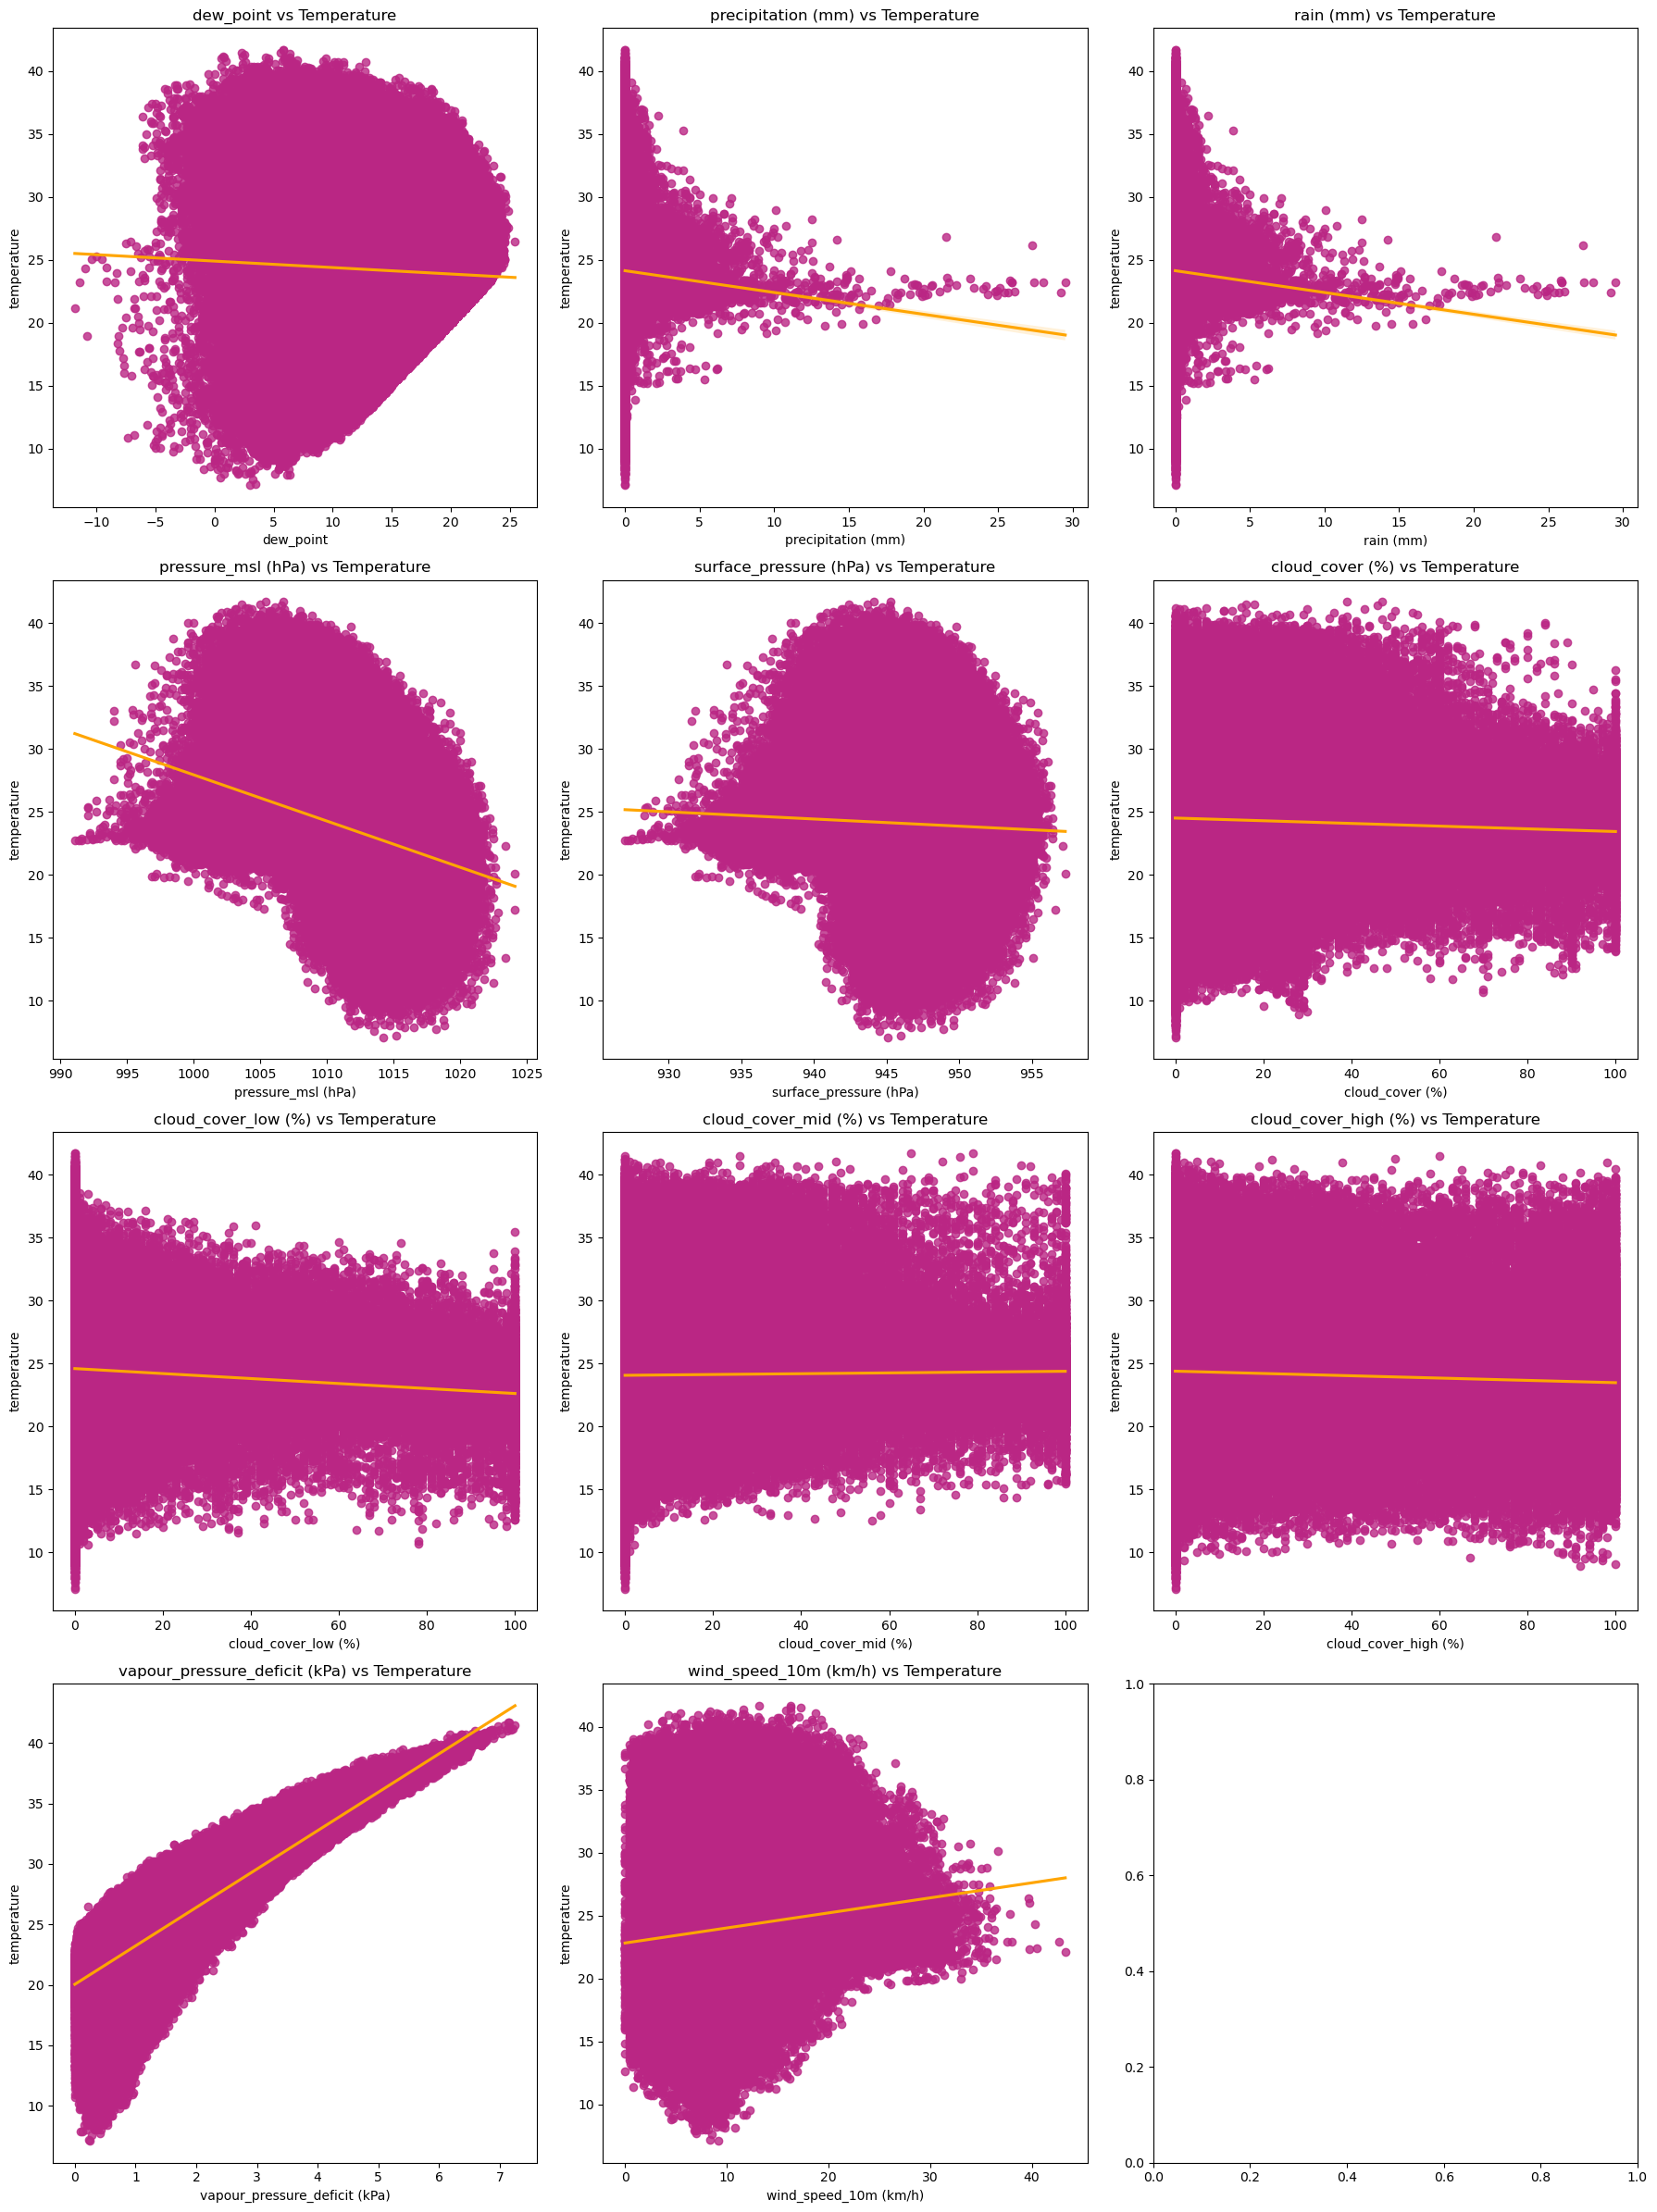

In [34]:
def scatter_plots (data, var, ax) :
    sns.regplot(x = data[var], y = data['temperature'], line_kws ={"color": "orange"}, color = "#BA2684", ax = ax)
    ax.set_title(f"{var} vs Temperature")

cols = raw_data.columns[2:]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(cols):
    scatter_plots(raw_data, col, axes[i])

plt.tight_layout()
plt.show()



In [35]:
raw_data.corr()['temperature'].sort_values(ascending=False).to_frame()

,temperature
temperature,1.000000
vapour_pressure_deficit (kPa),0.800407
wind_speed_10m (km/h),0.138692
cloud_cover_mid (%),0.016770
precipitation (mm),-0.019884
rain (mm),-0.019884
surface_pressure (hPa),-0.042457
dew_point,-0.062748
cloud_cover_high (%),-0.074306
cloud_cover (%),-0.084490
